In [1]:
##Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import pandas as pd
from sklearn.feature_selection import SelectFromModel

In [2]:
#load data
data_train=pd.read_csv('data_train.csv' )

In [3]:
#train and test split
X_train, X_val, y_train, y_val = train_test_split(data_train.drop('reordered', axis=1), data_train.reordered, test_size=0.8, random_state=50)

In [4]:
#perform train dataframe with RandomForestClassifier. 
rfc = RandomForestClassifier(n_estimators=10, n_jobs=-1 ,random_state=50)
model = rfc.fit(X_train, y_train) 

# Predict on validation set with fixed threshold
y_val_pred = (model.predict_proba(X_val)[:,1] >= 0.30).astype(int)

print("F1 Score: ",f1_score(y_val, y_val_pred, average='binary'))
print("Classification Report\n ", classification_report(y_val, y_val_pred))
print("Confusion Matrix\n ", confusion_matrix(y_val, y_val_pred))

F1 Score:  0.36460488948830344
Classification Report
                precision    recall  f1-score   support

         0.0       0.94      0.89      0.91   6117042
         1.0       0.31      0.44      0.36    662687

    accuracy                           0.85   6779729
   macro avg       0.62      0.67      0.64   6779729
weighted avg       0.88      0.85      0.86   6779729

Confusion Matrix
  [[5465891  651151]
 [ 369772  292915]]


In [5]:
#Feature importance
feature_importances_df = pd.DataFrame(model.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances_df)

                   importance
u_reordered_ratio    0.270822
p_reorder_ratio      0.199946
p_total_purchases    0.189392
times_last5          0.103124
u_total_orders       0.099090
uxp_reorder_ratio    0.086573
uxp_total_bought     0.051052


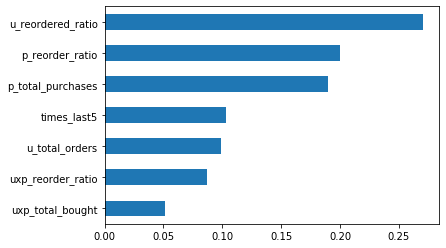

In [25]:
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values()
feat_importances.plot(kind='barh')

In [15]:
##modeling with different set of features
#Feature Selection
model2 = SelectFromModel(rfc, prefit=True, max_features=4)
feature_idx = model2.get_support()
feature_names = data_train.drop('reordered', axis=1).columns[feature_idx]
X_NEW = model2.transform(data_train.drop('reordered', axis=1))

In [8]:
#modeling with new features
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_NEW, data_train.reordered, test_size=0.8, random_state=50)
rfc2 = RandomForestClassifier(n_estimators=10, n_jobs=-1 ,random_state=50)
model3 = rfc2.fit(X_train2, y_train2) 

y_val_pred2 = (model3.predict_proba(X_val2)[:,1] >= 0.30).astype(int)

print("F1 Score: ",f1_score(y_val2, y_val_pred2, average='binary'))
print("Classification Report\n ", classification_report(y_val2, y_val_pred2))
print("Confusion Matrix\n ", confusion_matrix(y_val2, y_val_pred2))

F1 Score:  0.16139158262712947
Classification Report
                precision    recall  f1-score   support

         0.0       0.91      0.87      0.89   6117042
         1.0       0.14      0.19      0.16    662687

    accuracy                           0.81   6779729
   macro avg       0.52      0.53      0.53   6779729
weighted avg       0.83      0.81      0.82   6779729

Confusion Matrix
  [[5336517  780525]
 [ 536003  126684]]


In [22]:
#New Feature importance
X_NEW = pd.DataFrame(X_NEW, columns= feature_names)
feature_importances_df2 = pd.DataFrame(model3.feature_importances_, index = X_NEW.columns, columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances_df2)

                   importance
u_reordered_ratio    0.777144
p_reorder_ratio      0.120668
p_total_purchases    0.102187


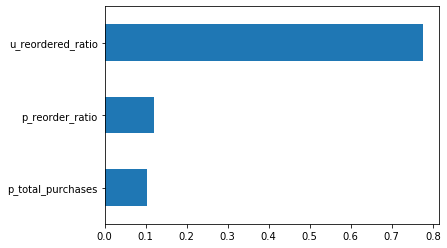

In [24]:
#Feature Importance Plot
feat_importances2 = pd.Series(model3.feature_importances_, index = X_NEW.columns).sort_values()
feat_importances2.plot(kind='barh')